#Importation: 

 


*  Prophet :  est une procédure de prévision des données de séries chronologiques basée sur un modèle additif où les tendances non linéaires sont adaptées à la saisonnalité annuelle, hebdomadaire et quotidienne, plus les effets des vacances. Il fonctionne mieux avec des séries chronologiques qui ont de forts effets saisonniers et plusieurs saisons de données historiques. Prophet résiste aux données manquantes et aux changements de tendance, et gère généralement bien les valeurs aberrantes.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import folium
from fbprophet import Prophet
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#I - Analyse de données, visualisation et comparaison : 



##1- Affichage des données :

In [ ]:
data3 = pd.read_csv('regions.csv')
data3.style.background_gradient(cmap='Reds')

,Region / الجهة,Total Cases / إجمالي الحالات,Active Cases / الحالات النشطة,Total Deaths / إجمالي الوفيات,Total Recovered / إجمالي المعافين
0,Tétouan-Al Hoceima,1109,777,29,305
1,Oriental,187,34,8,145
2,Fès-Meknès,1001,551,26,424
3,Rabat-Salé-Kénitra,705,362,11,332
4,Béni Mellal-Khénifra,120,59,7,54
5,Casablanca-Settat,2665,1963,46,656
6,Marrakech-Safi,1349,438,50,861
7,Drâa-Tafilalet,588,119,4,465
8,Souss-Massa,89,45,7,37
9,Guelmim-Oued Noun,45,26,0,29


In [ ]:
data1 = pd.read_csv('MA-times_series - MA-times_series.csv')
data1.head().style.background_gradient(cmap='Reds')

,Dates / التواريخ,Cases / الحالات,Recovered / تعافى,Deaths / الوفيات
0,03/02/2020,1,0,0
1,03/05/2020,2,0,0
2,03/10/2020,2,0,1
3,03/11/2020,6,0,1
4,03/13/2020,8,1,1


In [ ]:
data2 = pd.read_csv('cities.csv')
data2.head().style.background_gradient(cmap='Reds')

,City / المدينة,Region / المنطقة,Active Cases / الحالات النشطة,Total Deaths / إجمالي الوفيات,Total Recovered / إجمالي المعافين
0,Aïn Harrouda,Casablanca-Settat,0,0,0
1,Ben Yakhlef,Casablanca-Settat,0,0,0
2,Bouskoura,Casablanca-Settat,0,0,0
3,Casablanca,Casablanca-Settat,130,1,1
4,Médiouna,Casablanca-Settat,0,0,0


##2 -  visualisation des cas infectés chaque jours par coronavirus :

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Dates / التواريخ'], y = data1['Cases / الحالات'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Cases',plot_bgcolor='rgb(230, 230, 330)', xaxis_tickangle=-40)
fig.show()
#fig = px.bar(data1, x="Dates / التواريخ", y="Cases / الحالات", color='Cases / الحالات', orientation='v', height=600,
 #            title='Confirmed Cases in Morocco', color_discrete_sequence = px.colors.cyclical.IceFire)

#fig.update_layout(plot_bgcolor='rgb(230, 230, 330)', xaxis_tickangle=-40)
#fig.show()


##3 - Comparaison entre les cas confirmés, les décès et les rétablis : 

* Comparaison des cas totals : 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1['Dates / التواريخ'], y = data1['Cases / الحالات'], mode='lines+markers', name='Confirmed', line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=data1['Dates / التواريخ'], y = data1['Deaths / الوفيات'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=data1['Dates / التواريخ'], y=data1['Recovered / تعافى'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Comparaison', xaxis_tickfont_size=15,yaxis=dict(title='Number of Cases'), xaxis_tickangle=-45)

fig.show()

* Comparaison par région 

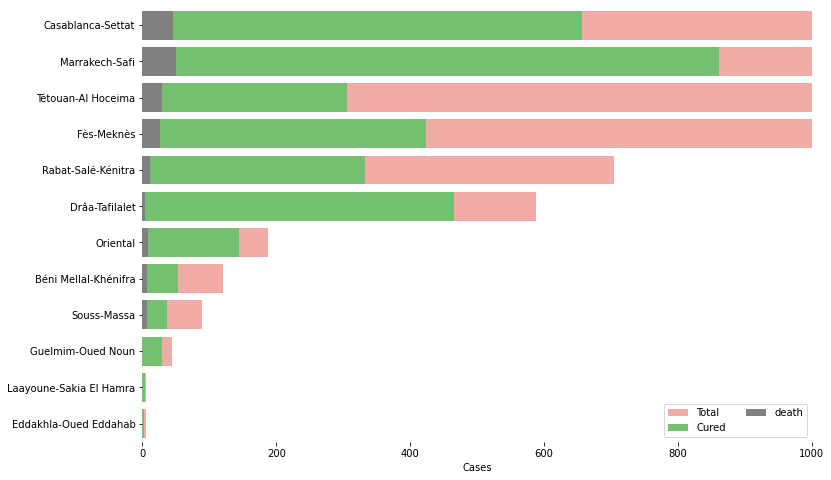

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
data3.sort_values('Total Cases / إجمالي الحالات',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases / إجمالي الحالات", y="Region / الجهة", data=data3,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Total Recovered / إجمالي المعافين", y="Region / الجهة", data=data3, label="Cured", color="g")

sns.set_color_codes("muted")
sns.barplot(x="Total Deaths / إجمالي الوفيات", y="Region / الجهة", data=data3, label="death", color="grey")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)





##4 - Visualisation de la répartition géographiquement :





In [ ]:
data4 = pd.read_csv('coordonnes - Feuille 1 (2).csv')
data4.head().style.background_gradient(cmap='Reds')

,Region / الجهة,Latitude,Longitude
0,Tanger-Tétouan-Al Hoceima,35.202941,-5.551017
1,Oriental,33.320214,-2.423847
2,Fès-Meknès,33.833314,-4.855638
3,Rabat-Salé-Kénitra,33.920433,-6.367609
4,Béni Mellal-Khénifra,32.640750,-6.207105


In [ ]:
df_full = pd.merge(data4,data3,on='Region / الجهة')
df_full.head().style.background_gradient(cmap='Reds')

,Region / الجهة,Latitude,Longitude,Total Cases / إجمالي الحالات,Active Cases / الحالات النشطة,Total Deaths / إجمالي الوفيات,Total Recovered / إجمالي المعافين
0,Oriental,33.320214,-2.423847,187,34,8,145
1,Fès-Meknès,33.833314,-4.855638,1001,551,26,424
2,Rabat-Salé-Kénitra,33.920433,-6.367609,705,362,11,332
3,Béni Mellal-Khénifra,32.640750,-6.207105,120,59,7,54
4,Casablanca-Settat,33.262713,-7.963903,2665,1963,46,656


In [ ]:

df_full = pd.merge(data4,data3,on='Region / الجهة')
fig = folium.Figure(width=1000, height=600)
map = folium.Map(location=[29.852972, -12.763558], zoom_start=6,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases / إجمالي الحالات'], df_full['Region / الجهة']):
    folium.CircleMarker(
        [lat, lon],
        radius=.1 * value//2,
        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),
        color='black',
        fill_color='red',
        fill_opacity=0.7 ).add_to(map)
#map
fig.add_child(map)

#II - Prédiction du nombre total des cas au maroc

In [ ]:
confirmed = data1.groupby('Dates / التواريخ').sum()['Cases / الحالات'].reset_index()
deaths = data1.groupby('Dates / التواريخ').sum()['Deaths / الوفيات'].reset_index()
recovered = data1.groupby('Dates / التواريخ').sum()['Recovered / تعافى'].reset_index()

## 1 - Prédiction de cas confirmés de coronavirus au maroc avec Prophet : 

In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.head()


,ds,y
0,2020-03-13,8
1,2020-03-14,18
2,2020-03-15,29
3,2020-03-16,38
4,2020-03-18,54


In [ ]:
model1 = Prophet()
model1.fit(confirmed)
future1 = model1.make_future_dataframe(periods=13)
future1 = future1.drop(future1.index[[0]])
future1.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
94,2020-06-10
95,2020-06-11
96,2020-06-12
97,2020-06-13
98,2020-06-14


In [ ]:
prediction1 = model1.predict(future1)
prediction1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2020-06-10,8767.362445,8568.146742,8967.302203
94,2020-06-11,8810.533911,8601.419948,9016.792452
95,2020-06-12,8925.814877,8690.922678,9161.377201
96,2020-06-13,9001.141720,8750.152223,9261.471349
97,2020-06-14,9077.795138,8811.952781,9369.257359


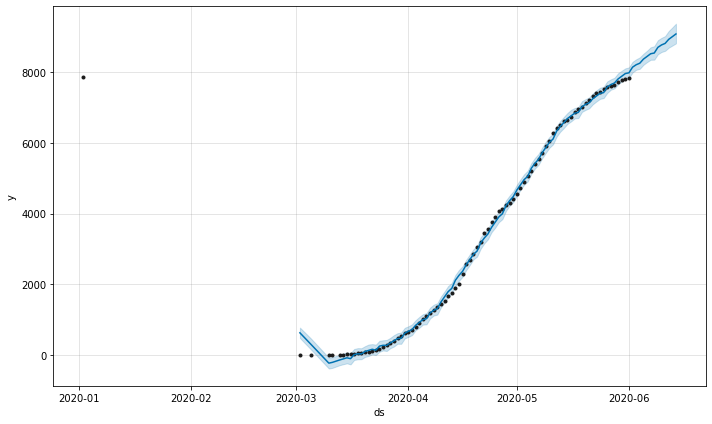

In [ ]:
 confirmed_forecast_plot =model1.plot(prediction1)

## 2 - Prédiction des décès au maroc à l'aide de Prophet :

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
model2 = Prophet(interval_width=0.95)
model2.fit(deaths)
future2 = model2.make_future_dataframe(periods=14)
future2 = future2.drop(future2.index[[0]])
future2.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
95,2020-06-11
96,2020-06-12
97,2020-06-13
98,2020-06-14
99,2020-06-15


In [ ]:
prediction2 = model2.predict(future2)
prediction2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
94,2020-06-11,264.062051,182.423820,349.132278
95,2020-06-12,239.991574,154.778115,329.771319
96,2020-06-13,242.240309,154.948359,333.556559
97,2020-06-14,244.822320,156.039176,329.001769
98,2020-06-15,247.386520,157.969995,329.034450


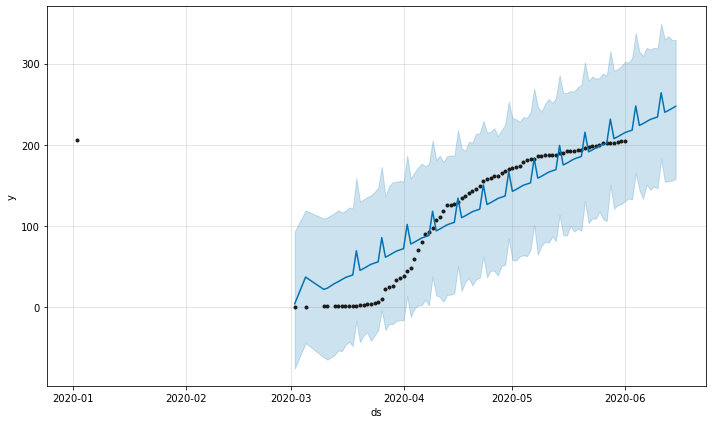

In [ ]:
deaths_forecast_plot = model2.plot(prediction2)

## 3 - Prédiction des cas rétablis au maroc a l'aide de Prophet :

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
model3 = Prophet()
model3.fit(recovered)
future3 = model3.make_future_dataframe(periods=14)
future3 = future3.drop(future3.index[[0]])
future3.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
95,2020-06-11
96,2020-06-12
97,2020-06-13
98,2020-06-14
99,2020-06-15


In [ ]:
prediction3 = model3.predict(future3)
prediction3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
94,2020-06-11,4638.827042,2956.768261,6492.070060
95,2020-06-12,3892.491335,2077.807046,5610.407176
96,2020-06-13,3968.043743,2100.777592,5691.190032
97,2020-06-14,4025.009089,2150.906622,5821.556438
98,2020-06-15,4185.707530,2370.727024,5898.463044


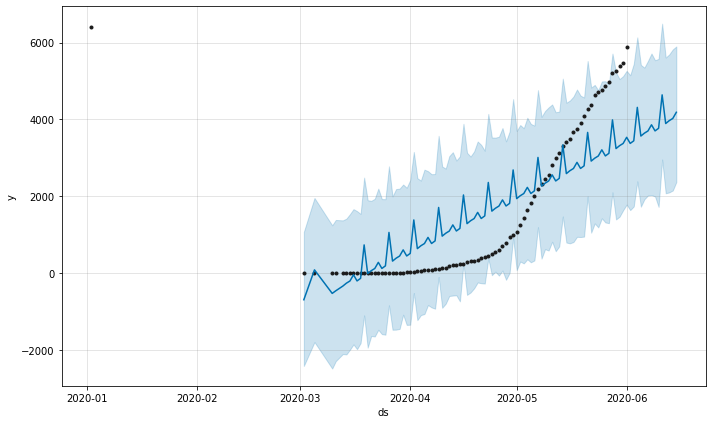

In [ ]:
recovered_forecast_plot = model3.plot(prediction3)